### 1.문제정의
- 버섯데이터를 활용해서 독성/식용 버섯을 분류

### 2.데이터수집

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# 데이터 분리도구

In [3]:
# 데이터 불러오기
data = pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


| 컬럼명                     | 설명                                 | 값 설명                                                                 |
|------------------------|------------------------------------|-----------------------------------------------------------------------|
| poisonous              | 독성 여부                             | p: 독성, e: 식용                                                      |
| cap-shape              | 버섯 머리 모양                           | b: bell, c: conical, x: convex, f: flat, k: knobbed, s: sunken        |
| cap-surface            | 버섯 머리 표면                          | f: fibrous, g: grooves, y: scaly, s: smooth                           |
| cap-color              | 버섯 머리 색                           | n: brown, b: buff, c: cinnamon, g: gray, r: green, p: pink, u: purple, e: red, w: white, y: yellow |
| bruises                | 멍이 있는지 여부                         | t: bruises, f: no                                                     |
| odor                   | 냄새                                 | a: almond, l: anise, c: creosote, y: fishy, f: foul, m: musty, n: none, p: pungent, s: spicy |
| gill-attachment        | 아가미 부착 방식                          | a: attached, d: descending, f: free, n: notched                        |
| gill-spacing           | 아가미 간격                            | c: close, w: crowded, d: distant                                       |
| gill-size              | 아가미 크기                            | b: broad, n: narrow                                                   |
| gill-color             | 아가미 색                             | k: black, n: brown, b: buff, h: chocolate, g: gray, r: green, o: orange, p: pink, u: purple, e: red, w: white, y: yellow |
| stalk-shape            | 대의 형태                             | e: enlarging, t: tapering                                             |
| stalk-root             | 대의 뿌리 모양                          | b: bulbous, c: club, u: cup, e: equal, z: rhizomorphs, r: rooted, ?: missing |
| stalk-surface-above-ring | 고리 위 대의 표면 상태                     | f: fibrous, y: scaly, k: silky, s: smooth                             |
| stalk-surface-below-ring | 고리 아래 대의 표면 상태                    | f: fibrous, y: scaly, k: silky, s: smooth                             |
| stalk-color-above-ring  | 고리 위 대의 색                        | n: brown, b: buff, c: cinnamon, g: gray, o: orange, p: pink, e: red, w: white, y: yellow |
| stalk-color-below-ring  | 고리 아래 대의 색                       | n: brown, b: buff, c: cinnamon, g: gray, o: orange, p: pink, e: red, w: white, y: yellow |
| veil-type              | 베일(버섯의 막)의 타입                     | p: partial, u: universal                                              |
| veil-color             | 베일의 색                             | n: brown, o: orange, w: white, y: yellow                              |
| ring-number            | 고리의 수                             | n: none, o: one, t: two                                               |
| ring-type              | 고리의 타입                            | c: cobwebby, e: evanescent, f: flaring, l: large, n: none, p: pendant, s: sheathing, z: zone |
| spore-print-color      | 포자 인쇄 색                          | k: black, n: brown, b: buff, h: chocolate, r: green, o: orange, u: purple, w: white, y: yellow |
| population             | 개체군                                | a: abundant, c: clustered, n: numerous, s: scattered, v: several, y: solitary |
| habitat                | 서식지                                | g: grasses, l: leaves, m: meadows, p: paths, u: urban, w: waste, d: woods |


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# 문제데이터, 정답데이터 분리
X = data.drop("poisonous", axis=1)
y = data['poisonous']

In [7]:
X.shape, y.shape
# 문제데이터: 8124행 22열
# 8124개의 버섯데이터 , 22개 특성

((8124, 22), (8124,))

In [8]:
# 기술 통계량
X.describe().T

# count : 데이터 개수
# unique : 고유값들의 개수(클래스 개수)
# top : 가장 많은 클래스
# freq : 가장 많은 클래스의 빈도수

,count,unique,top,freq
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


### 3.데이터전처리
- 문자열 데이터 -> 수치화 : 인코딩
- 인코딩 방법 2가지
    - 라벨인코딩 : 값의 크고 작음의 의미가 유용한 경우 활용
    - 원핫인코딩 : 값의 크고 작음의 의미가 없을 때 활용

In [10]:
# 원핫인코딩
# 컬럼의 unique 개수만큼 컬럼을 추가한 뒤, 1 or 0을 채워주는 방식
X_one_hot = pd.get_dummies(X)
X_one_hot.shape
# 총 117ea의 컬럼으로 확장됨!

(8124, 117)

In [17]:
# 라벨인코딩
# 각 문자열에 숫자를 매핑하는 방법
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [12]:
# mapping할 클래스값과 숫자값을 짝지어줌
hb_dict = {
    'u':1, 
    'g':2, 
    'm':3, 
    'd':4, 
    'p':5, 
    'w':6, 
    'l':7
}

# 특정대상을 딕셔너리에 넣고, map() 매개변수로 지정
X['habitat'].map(hb_dict)

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [13]:
y_map = y.map({'p':1,'e':0})

In [17]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y ,test_size=0.3, 
                                                    random_state=2024, 
                                                    stratify=y)
# 역할
#1. 데이터 분리
#2. 랜덤샘플링 -> 랜덤키 고정

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))

In [19]:
y_train.value_counts()

poisonous
e    2945
p    2741
Name: count, dtype: int64

In [20]:
y_test.value_counts()

poisonous
e    1263
p    1175
Name: count, dtype: int64

### 4.EDA

### 5.모델선택 및 하이퍼파라미터 조정

### 6.모델학습

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### 7.모델평가

In [25]:
tree.score(X_test, y_test)
# 과대적합 -> 100

1.0

#### 하이퍼파라미터 조정을 통한 과적합 제어

In [26]:
tree2 = DecisionTreeClassifier(max_depth=3)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
tree2.score(X_test, y_test)

0.9868744872846595

### 교차검증
- 모델의 일반화 확인을 위하여!
- 학습-평가 데이터 나누기를 여러 번 반복하여 일반화 error를 평가하는 방법
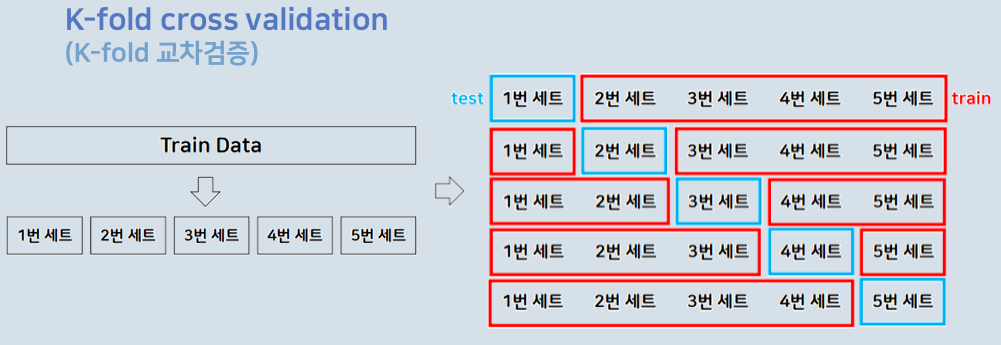

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(tree2, X_train, y_train, cv=5)

array([0.98594025, 0.98680739, 0.98504837, 0.98240985, 0.98240985])

In [71]:
cross_val_score(tree2, X_train, y_train, cv=5).mean()

0.9845231415574238

In [30]:
cross_val_score(tree, X_train, y_train, cv=5)
# 첫번째 모델은 과적합일 확률이 높아보이지만,
# 과적합은 아님 ->
# 특성 분리가 잘 되어있는 데이터로 학습하였기 때문

array([1.        , 1.        , 1.        , 1.        , 0.99912049])

#### tree 모델 내부 시각화

In [73]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
   ---------------------------------------- 47.0/47.0 kB 584.1 kB/s eta 0:00:00


In [31]:
import graphviz # 불러오는 용도
from sklearn.tree import export_graphviz  # 내보내기

In [32]:
export_graphviz(tree, out_file="./data/tree.dot", # 모델, 경로 및 파일이름 설정
               class_names=['독','식용'], # 정답 이름 설정
               feature_names=X_one_hot.columns, # 컬럼이름 설정
               impurity=True, # 지니불순도 값을 출력 여부
               filled=True) # 각 노드의 클래스가 구분되도록 색을 칠해주는 옵션

In [33]:
with open('./data/tree.dot', encoding="UTF-8") as f : # 파일 지정
    dot_graph = f.read() # 파일을 읽어서 변수에 할당

In [35]:
import os
os.environ['PATH']+=os.pathsep+'C:\\Program Files\\Graphviz\\bin\\'

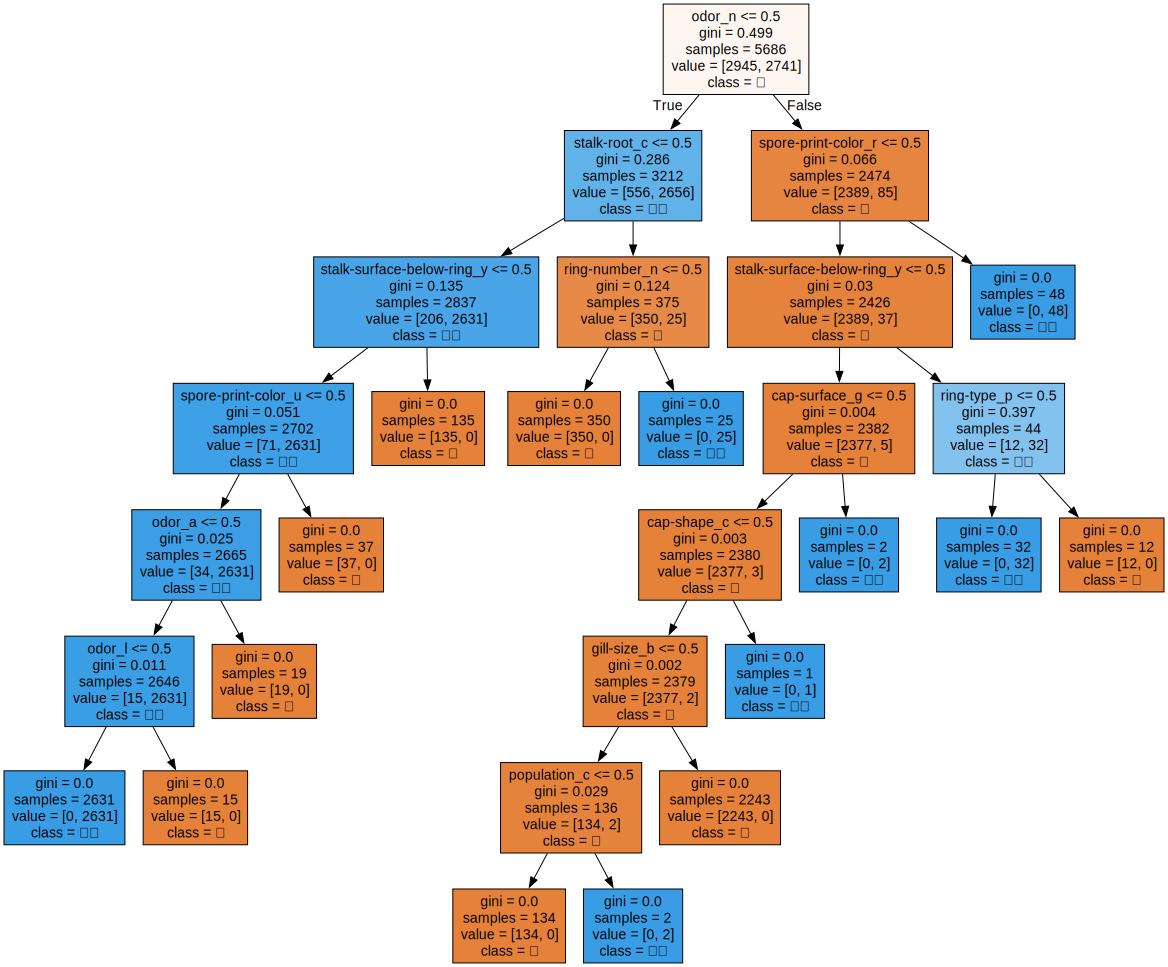

In [36]:
display(graphviz.Source(dot_graph))

In [ ]:
# tree2 (과적합 제어모델) -> 그래프그려보기

### 특성선택
- 의사결정나무가 의사결정을 할때 선택하는 질문 (특성선택) 우선순위 확인
- 의사결정나무는 특성의 중요도가 높은 특성을 상단에 우선 배치
- 지도학습 모델에서는 데이터들의 특성의 중요도를 출력
- 특성들 중 정답에 가장 큰 영향을 미칠수록 큰 수치
- 각 특성들은 0~1 사이의 수치 가지며, 특성중요도의 총 합은 1

In [40]:
# 전체 컬럼명 확인
pd.set_option('display.max_seq_items', None)
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f',
       'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n',
       'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
    

In [42]:
# 특성 중요도 확인
fi=tree.feature_importances_
fi

array([0.00000000e+00, 7.02909617e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40404868e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.31377431e-02, 0.00000000e+00,
       0.00000000e+00, 1.05059369e-02, 0.00000000e+00, 6.18337043e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.95329768e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.72843403e-01, 0.00000000e+00, 0.00000000e+00,
      

In [48]:
pd.set_option('display.max_rows', None)
# DataFrame으로 만들기
fi_df= pd.DataFrame(fi, index=X_one_hot.columns, columns=['특성중요도'])
fi_df
# 내림차순으로 정리
fi_df.sort_values('특성중요도', ascending=False)

,특성중요도
odor_n,0.618337
stalk-root_c,0.172843
stalk-surface-below-ring_y,0.101873
spore-print-color_r,0.032151
spore-print-color_u,0.025054
ring-number_n,0.016436
odor_a,0.013138
odor_l,0.010506
ring-type_p,0.006147
cap-surface_g,0.001404


### 정리
- tree 모델 시각화 표를 보면 특성중요도가 가장 높았던 'odor_n' 컬럼을 가장먼저 고려하여 데이터를 분류한것을 확인
- 특성중요도가 가장 높은 컬럼을 먼저 고려해야지 효율적인 분류가 가능하다!
- 현재 mushroom 데이터는 한가지의 특성이 60% 이상의 중요도를 혼자 차지하고 있었기 때문에 모델학습이 용이 -> 100% 의 정확도가 나왔던것 -> 과대적합 XX 라고 판단할 수 있다.
- 특성이 117개나 되었지만 실질적으로 영향을 미치는 특성은 몇개 안되더라~

### 의사결정나무 특징
- 장점
    - 이해하기가 쉽다
    - 직관적이다
    - 기초모델임에도 불구하고 꽤나 높은 성능을 보이는 편
- 단점
    - 과대적합의 확률이 높다
    - 사전가지치기를 통해 과대적합을 제어 해줘야한다~


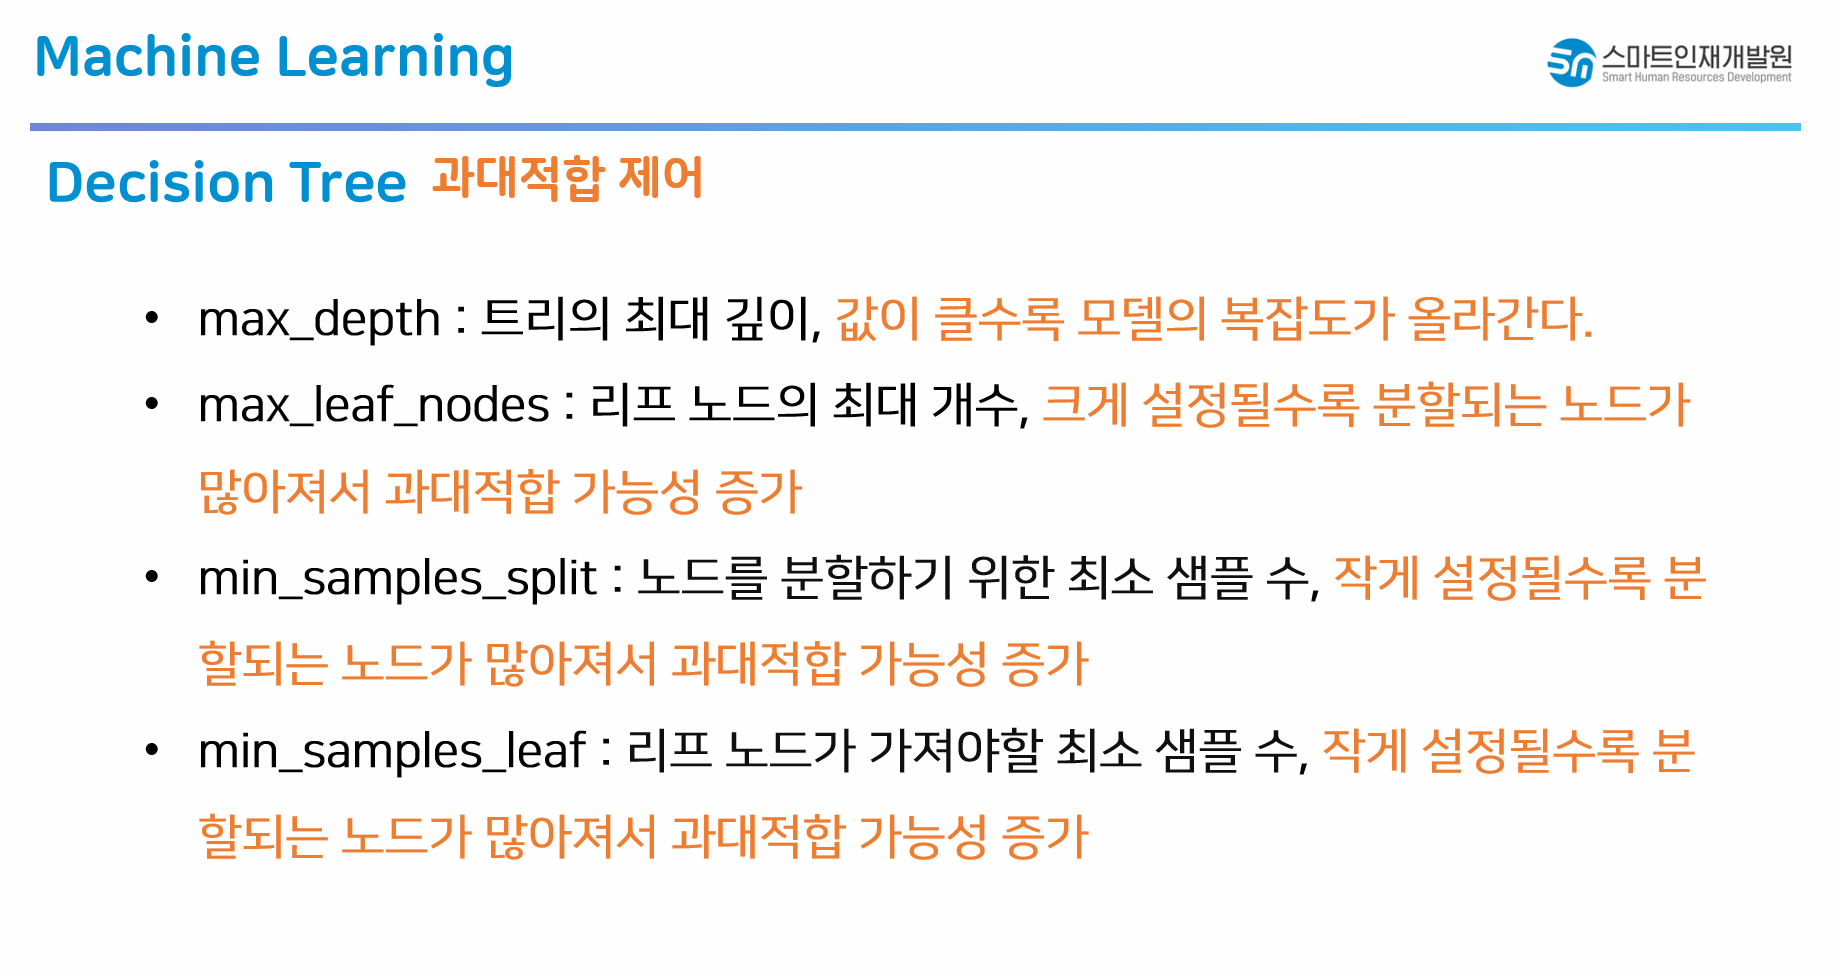